| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

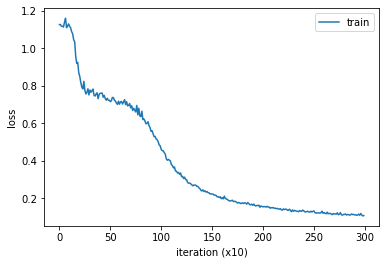

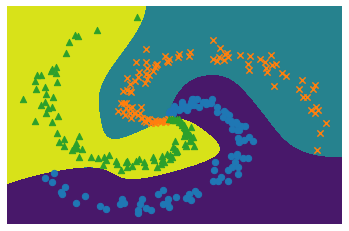

In [21]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iteration (x10)')
plt.ylabel('loss')
plt.legend()
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


| 에폭 1 |  반복 10 / 10 | 손실 1.19
| 에폭 2 |  반복 10 / 10 | 손실 1.17
| 에폭 3 |  반복 10 / 10 | 손실 1.14
| 에폭 4 |  반복 10 / 10 | 손실 1.16
| 에폭 5 |  반복 10 / 10 | 손실 1.17
| 에폭 6 |  반복 10 / 10 | 손실 1.18
| 에폭 7 |  반복 10 / 10 | 손실 1.14
| 에폭 8 |  반복 10 / 10 | 손실 1.10
| 에폭 9 |  반복 10 / 10 | 손실 1.13
| 에폭 10 |  반복 10 / 10 | 손실 1.19
| 에폭 11 |  반복 10 / 10 | 손실 1.10
| 에폭 12 |  반복 10 / 10 | 손실 1.10
| 에폭 13 |  반복 10 / 10 | 손실 1.08
| 에폭 14 |  반복 10 / 10 | 손실 0.98
| 에폭 15 |  반복 10 / 10 | 손실 0.95
| 에폭 16 |  반복 10 / 10 | 손실 0.89
| 에폭 17 |  반복 10 / 10 | 손실 0.89
| 에폭 18 |  반복 10 / 10 | 손실 0.85
| 에폭 19 |  반복 10 / 10 | 손실 0.85
| 에폭 20 |  반복 10 / 10 | 손실 0.80
| 에폭 21 |  반복 10 / 10 | 손실 0.81
| 에폭 22 |  반복 10 / 10 | 손실 0.79
| 에폭 23 |  반복 10 / 10 | 손실 0.78
| 에폭 24 |  반복 10 / 10 | 손실 0.75
| 에폭 25 |  반복 10 / 10 | 손실 0.76
| 에폭 26 |  반복 10 / 10 | 손실 0.75
| 에폭 27 |  반복 10 / 10 | 손실 0.78
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.75
| 에폭 30 |  반복 10 / 10 | 손실 0.74
| 에폭 31 |  반복 10 / 10 | 손실 0.75
| 에폭 32 |  반복 10 

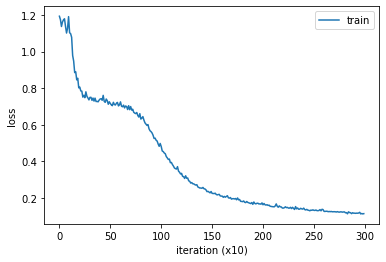

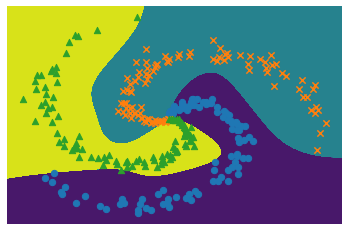

In [22]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 15
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iteration (x10)')
plt.ylabel('loss')
plt.legend()
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


In [2]:
xx

array([[-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
         1.0886493],
       [-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
         1.0886493],
       [-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
         1.0886493],
       ...,
       [-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
         1.0886493],
       [-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
         1.0886493],
       [-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
         1.0886493]])

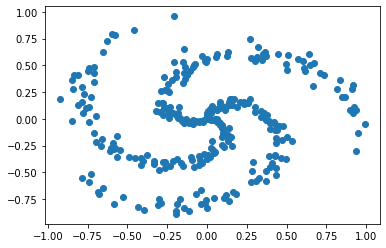

In [3]:
plt.scatter(x[:,0], x[:,1])

In [4]:
xx.ravel()

array([-1.0223507, -1.0213507, -1.0203507, ...,  1.0866493,  1.0876493,
        1.0886493])

In [5]:
xx.ravel().shape

(4323264,)

In [6]:
xx.shape

(2047, 2112)

In [7]:
yy.shape

(2047, 2112)

In [8]:
x_min, y_min

(-1.0223506996640548, -0.9886726617070215)

In [9]:
x_max, y_max

(1.0889954428950932, 1.0580883414647684)

In [10]:
x_max-x_min, y_max-y_min

(2.1113461425591478, 2.04676100317179)

In [11]:
score

array([[ 7.0750414 , -6.07991423, -1.0589919 ],
       [ 7.07900866, -6.07605854, -1.06679914],
       [ 7.08296037, -6.07223889, -1.07455478],
       ...,
       [-0.21141344,  5.13294553, -4.89219269],
       [-0.21039943,  5.13274253, -4.89299605],
       [-0.20938711,  5.13254678, -4.89380497]])

In [12]:
predict_cls

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [14]:
predict_cls.shape

(4323264,)

In [15]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=int64)

In [19]:
Z.shape

(2047, 2112)

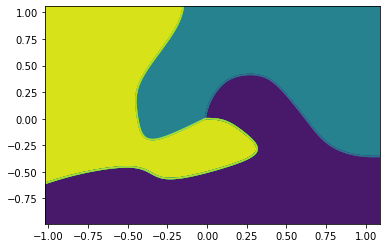

In [18]:
plt.contour(xx, yy, Z)
plt.contourf(xx, yy,Z)
plt.show()